# Ridge Regression

In [66]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
## Load the training data into feature matrix, class labels, and event ids:

In [68]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Features Preparation
 * Standardization
 * PCA ( TODO )
 * Polynomial basis

In [78]:
from helpers import *
# Standardization
tX_norm = normalize(tX)

# Polynomial Basis
degree = 3
print("normal", tX.shape)
tX_poly = polynomialBasis(tX_norm, degree)
tX_basis = tX_poly
print("basis", tX_basis.shape)

# ---------- PCA test

pcatX = plt.mlab.PCA(tX_basis)
print(pcatX.Y.shape)
num_feature = np.nonzero(np.cumsum(pcatX.fracs) > 0.9)
num_useless = np.nonzero(np.cumsum(pcatX.fracs) < 0.9)
print(num_feature)
print(num_useless)
tX_filtered = np.delete(tX_basis,num_useless, axis = 1)
print(tX_filtered.shape)
# -- pas conculant


tXTr = np.hstack((np.ones((tX_basis.shape[0],1)), tX_basis))

normal (250000, 30)
basis (250000, 90)
(250000, 90)
(array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)
(250000, 59)


## Parameter Optimization

In [79]:
from cross_validation import *

k_fold = 2
nbPoints = 30
lambdas = np.logspace(-4, 0, nbPoints)
losses_tr = []
losses_te = []

#print("Gammas: {}".format(gammas))

i = 0    
for lam in lambdas:
    i = i + 1
    print("Step", i, "over", nbPoints, "| gamma: ", lam)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tXTr.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, tXTr, k_fold, k, lam, initial_w, 0, "ridge_regression")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("  -> loss_tr: {}\n  -> loss_te: {}".format(loss_tr, loss_te))



Step 1 over 30 | gamma:  0.0001
  -> loss_tr: 0.30764899566867177
  -> loss_te: 5.845172493870686
Step 2 over 30 | gamma:  0.000137382379588
  -> loss_tr: 0.3076515917627318
  -> loss_te: 5.792404515540349
Step 3 over 30 | gamma:  0.000188739182214
  -> loss_tr: 0.3076561828241734
  -> loss_te: 5.724352807040928
Step 4 over 30 | gamma:  0.00025929437974
  -> loss_tr: 0.30766413769042306
  -> loss_te: 5.638289254374802
Step 5 over 30 | gamma:  0.000356224789026
  -> loss_tr: 0.3076775747104089
  -> loss_te: 5.5320229028873245
Step 6 over 30 | gamma:  0.000489390091848
  -> loss_tr: 0.3076995817009951
  -> loss_te: 5.404472596797882
Step 7 over 30 | gamma:  0.00067233575365
  -> loss_tr: 0.3077343373116902
  -> loss_te: 5.25617742492211
Step 8 over 30 | gamma:  0.000923670857187
  -> loss_tr: 0.3077870068457172
  -> loss_te: 5.089472425683867
Step 9 over 30 | gamma:  0.00126896100317
  -> loss_tr: 0.30786332951728557
  -> loss_te: 4.908078758870873
Step 10 over 30 | gamma:  0.00174332882

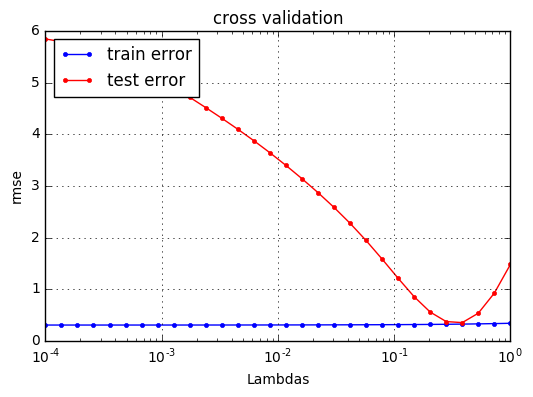

In [80]:
plt.semilogx(lambdas, losses_tr, marker=".", color='b', label='train error')
plt.semilogx(lambdas, losses_te, marker=".", color='r', label='test error')
plt.xlabel("Lambdas")
plt.ylabel("rmse")
plt.title("cross validation")
plt.legend(loc=2)
plt.grid(True)
plt.savefig("cross_validation")

=> Lambda : 10e-3

## Predict

In [52]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape)

(568238, 30)


In [53]:
lambda_ = 0.001

tXTr = np.hstack((np.ones((tX_basis.shape[0],1)), tX_basis))
train_w, loss_tr = ridge_regression(y, tXTr, lambda_)

tXTe = normalize(tX_test)
tXTe = polynomialBasis(tXTe, 2)
tXTe = np.delete(tX_basis, num_useless)
tXTe = np.hstack((np.ones((tX_test.shape[0],1)), tXTe))



In [54]:
OUTPUT_PATH = '../output/out.csv'

y_pred = predict_labels(train_w, tXTe)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)